# 데이터셋 불러오기

- `Dataset`: sample과 label을 저장
- `DataLoader`: `Dataset`을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체로 감쌈

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",                        # 학습/테스트 데이터가 저장되는 경로
    train=True,
    download=True,
    transform=ToTensor()                # feature와 label의 transform 지정
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [2]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [3]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

# 데이터셋을 순회하고 시각화하기

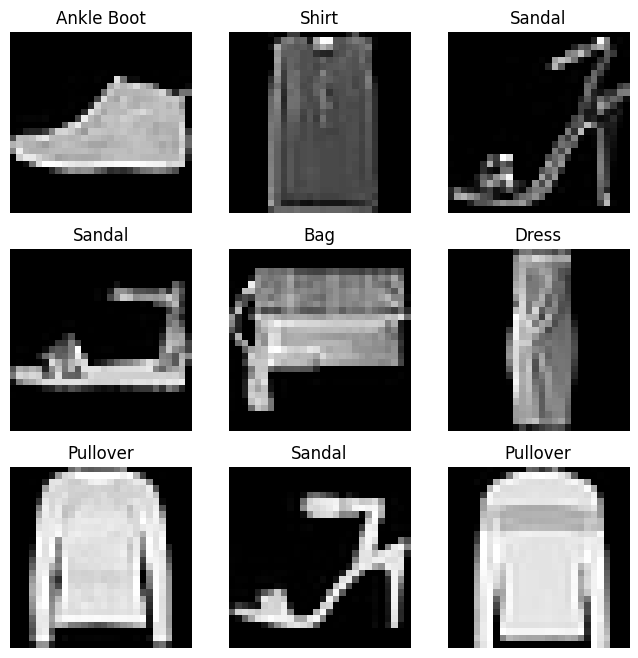

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# 파일에서 사용자 정의 데이터셋 만들기

- 사용자 정의 Dataset 클래스는 반드시 3개의 함수를 구현해야 함
    - `__init__`: Dataset 객체가 생성될 때 한 번만 실행됨. 주석 파일(`annotations_file`), 이미지 디렉토리(`img_dir`) 포함
    - `__len__`: 데이터셋의 샘플 개수를 반환하는 함수
    - `__getitem__`: 설정된 경로에서 주어진 `idx`에 해당하는 이미지와 레이블 반환 및 변환

In [5]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# DataLoader로 학습용 데이터 준비하기

- `Dataset`
    - 데이터셋의 feature를 가져오고 하나의 샘플에 label을 지정하는 일을 한 번에 함
    - 모델을 학습할 때, 샘플들을 minibatch로 전달하고, 매 epoch마다 데이터를 다시 섞어서 overfitting을 방지
    - Python의 `multiprocessing`을 사요하여 데이터 검색 속도 높임
- `DataLoader`는 간단한 API로 이러한 과정을 추상화한 iterable한 객체

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# DataLoader를 통해 순회하기(iterate)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


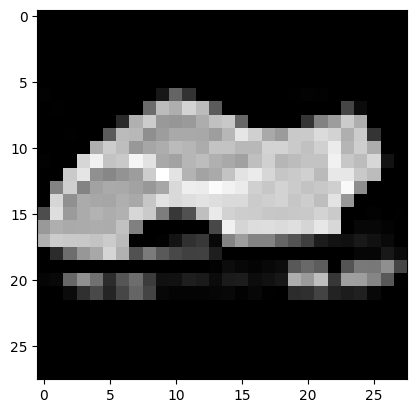

Label: 5


In [7]:
train_features, train_labels = next(iter(train_dataloader))     # 다음 batch를 가져옴
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()     # 첫 번째 이미지를 선택하여 차원 축소: (1, H, W) -> (H, W)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")